In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('E:/heart/Train.csv')

In [3]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#data in item weight is missing 17%. where as in outlet size it is missing 28% so 
#we could not perform cca on the null values. so we need to find best possible method of filling missing data 
#so that distribution of the data do not changes

In [7]:
numeric_col = data.select_dtypes(include = 'number').columns
categoric_col = data.select_dtypes(include = 'object').columns

# eda

In [8]:
# categorical variable 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


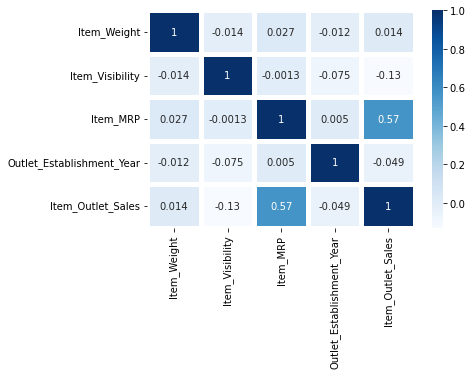

In [10]:
corr = data.corr()
sns.heatmap(corr,cmap = 'Blues',annot = True,linewidth = 5)

plt.show()

In [11]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('low fat','Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('LF','Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg','Regular')

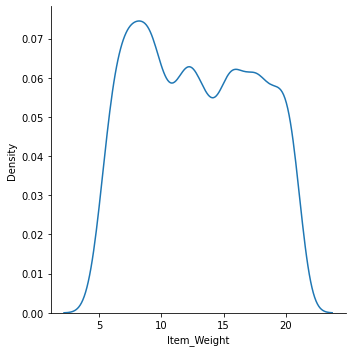

In [12]:

sns.displot(data = data,x = 'Item_Weight',kind = "kde",legend = True,palette = 'pastel')
plt.show()

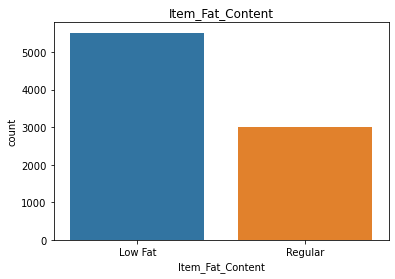

In [13]:
sns.countplot(x = 'Item_Fat_Content',data = data)
plt.title('Item_Fat_Content')
plt.show()

In [14]:
Data_of_Low_fat = data[data.Item_Fat_Content == 'Low Fat']

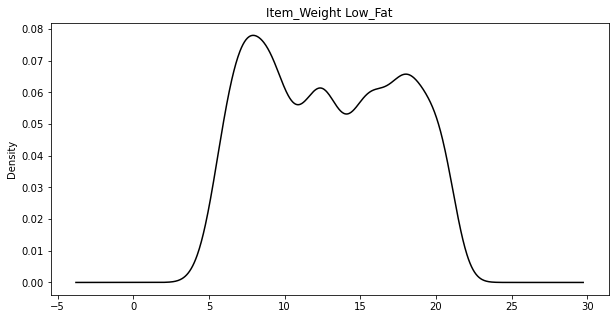

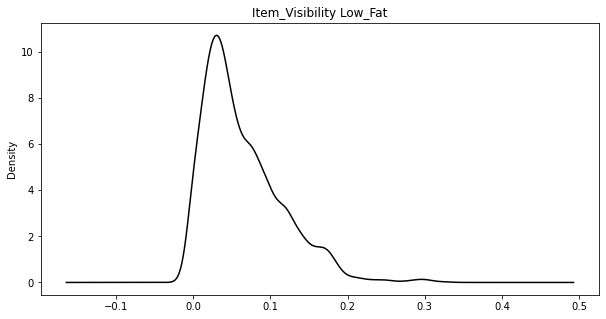

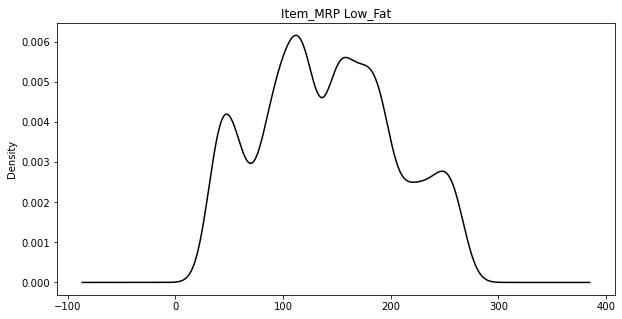

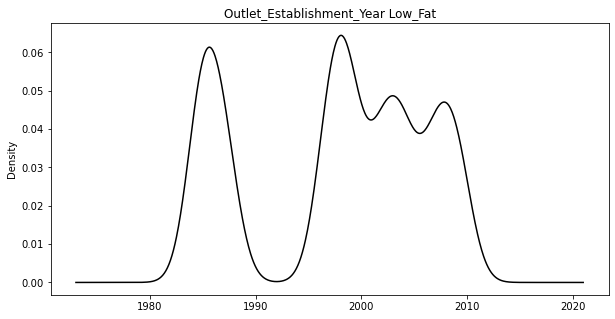

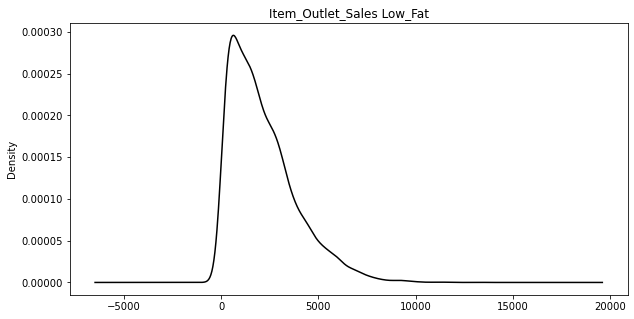

In [15]:
#plots of Low fat 
for i in numeric_col:
    plt.figure(figsize = (10,5))
    Data_of_Low_fat[i].plot.density(color = 'black')
    plt.title(i+' Low_Fat')
    plt.show()

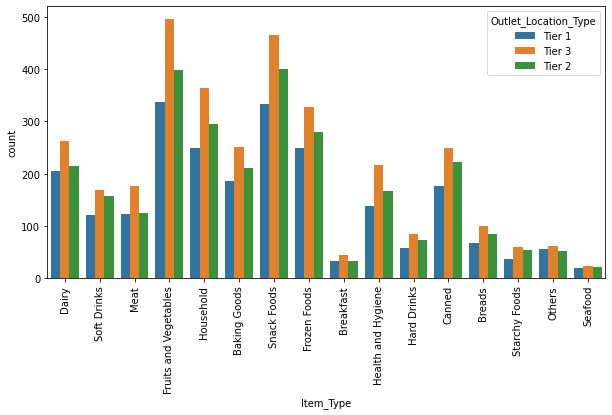

In [16]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Item_Type',data = data,hue ='Outlet_Location_Type')

plt.xticks(rotation = 'vertical')
plt.show()

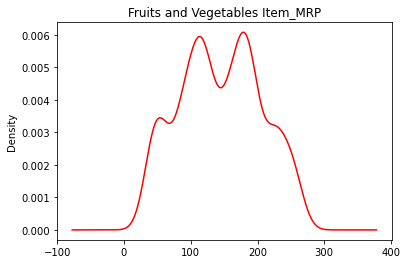

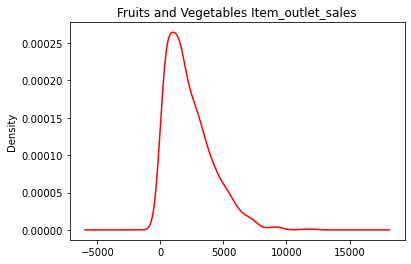

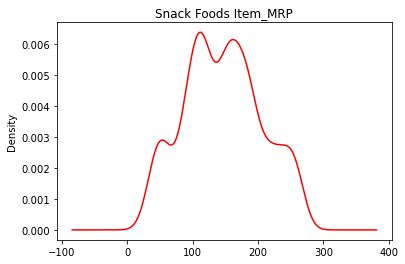

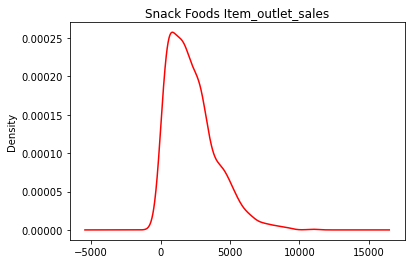

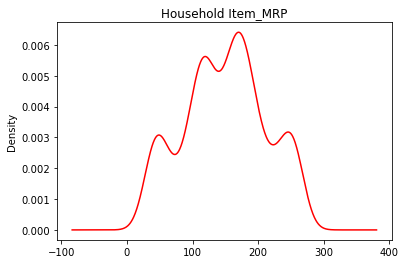

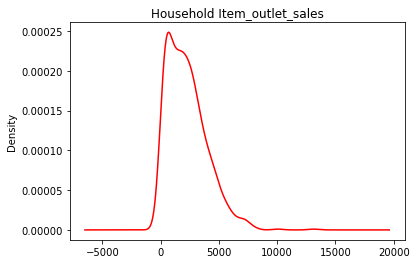

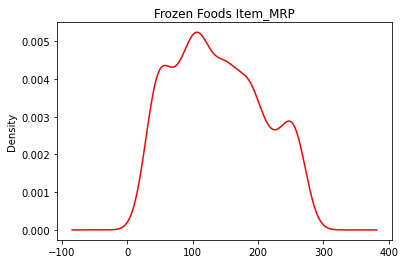

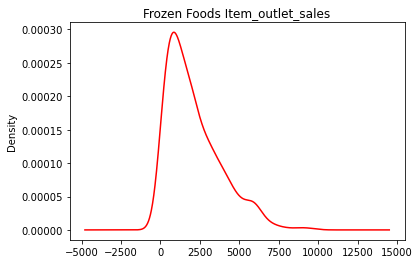

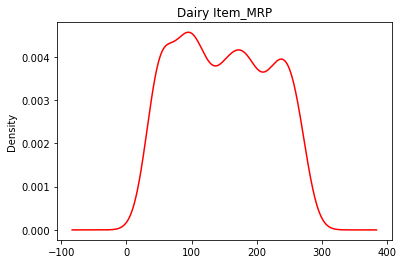

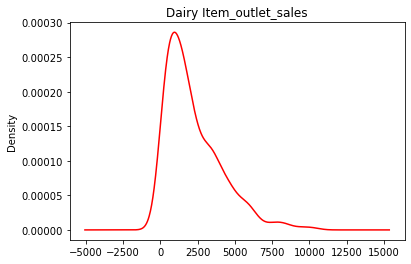

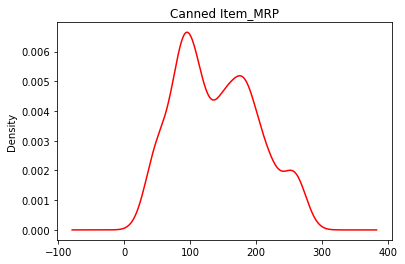

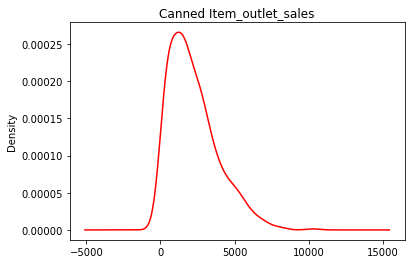

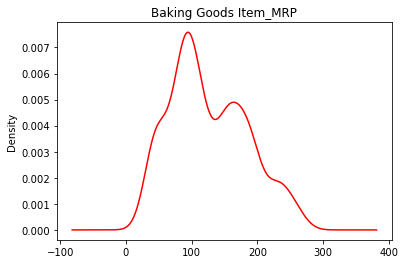

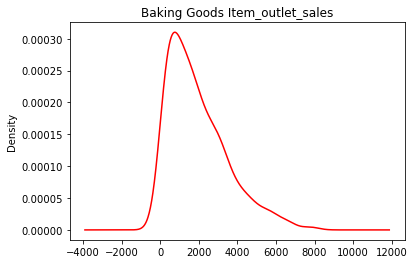

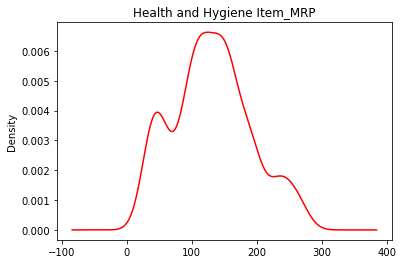

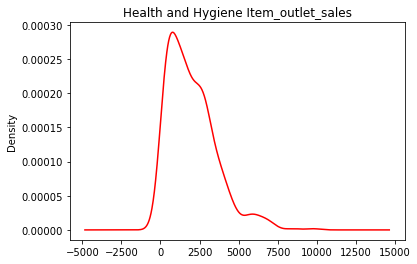

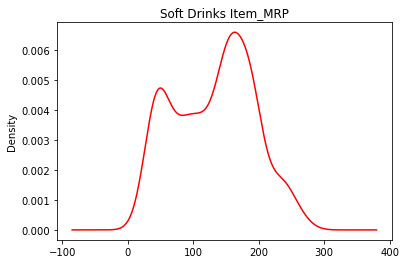

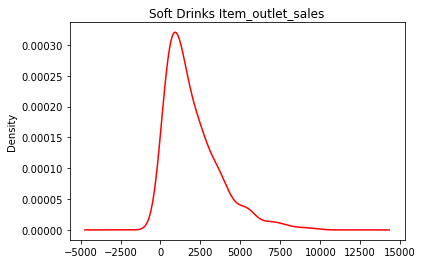

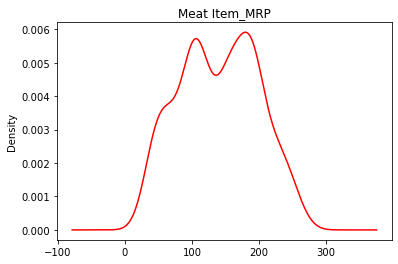

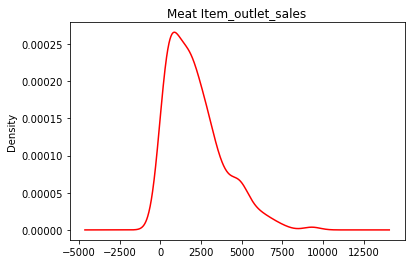

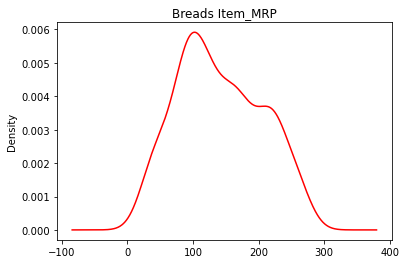

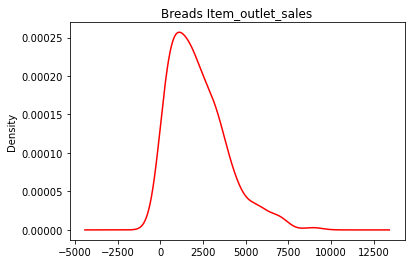

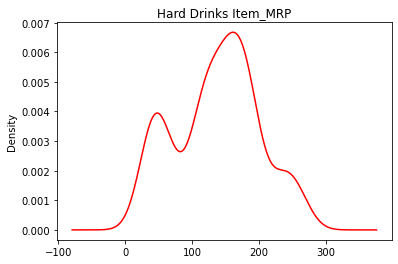

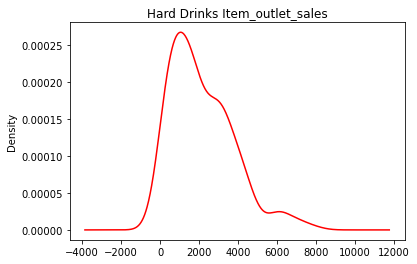

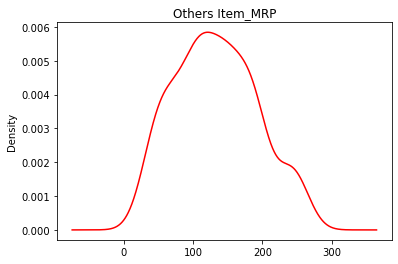

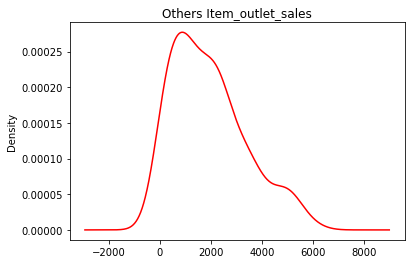

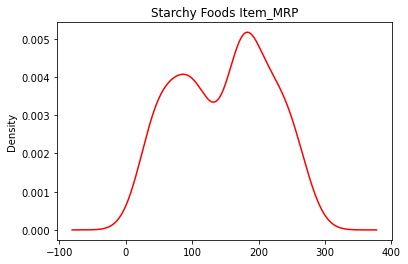

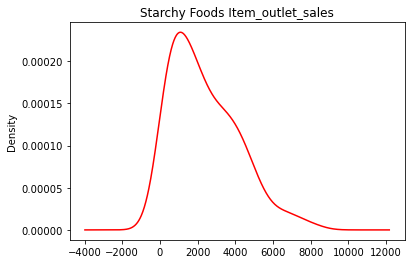

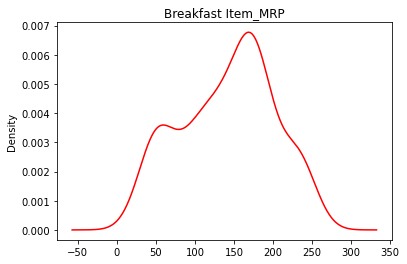

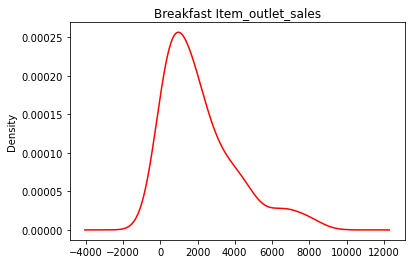

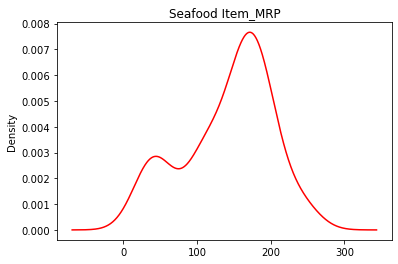

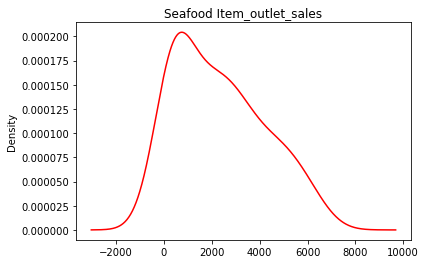

In [17]:
food_item = data.Item_Type.value_counts().index
for i in food_item:
    x1 = data[data.Item_Type == i]
    x1.Item_MRP.plot.density(color = 'red')
    plt.title(i+' Item_MRP')
    plt.show()
    x1.Item_Outlet_Sales.plot.density(color = 'red')
    plt.title(i+' Item_outlet_sales')
    plt.show()

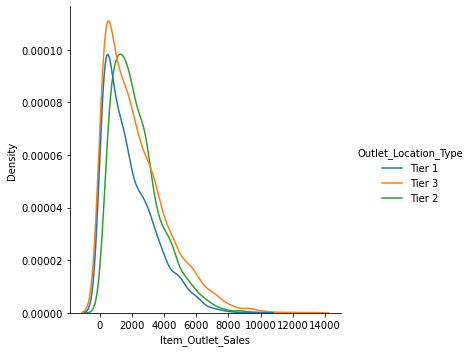

In [18]:
# density plot by outlet_location_type and outlet_sales

sns.displot(data = data,x = 'Item_Outlet_Sales',kind = "kde",hue = 'Outlet_Location_Type')
plt.show()

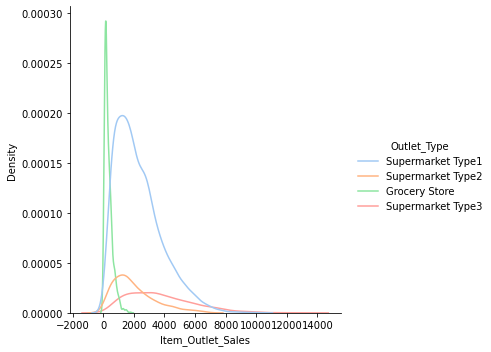

In [19]:
# density plot by supermarket_type and outlet_sales

sns.displot(data = data,x = 'Item_Outlet_Sales',kind = "kde",hue = 'Outlet_Type',legend = True,palette = 'pastel')
plt.show()

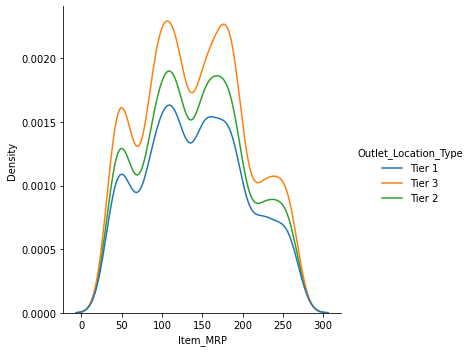

In [20]:
#mrp according to outlet loccations type
sns.displot(data = data,x = 'Item_MRP',kind = "kde",hue = 'Outlet_Location_Type')
plt.show()

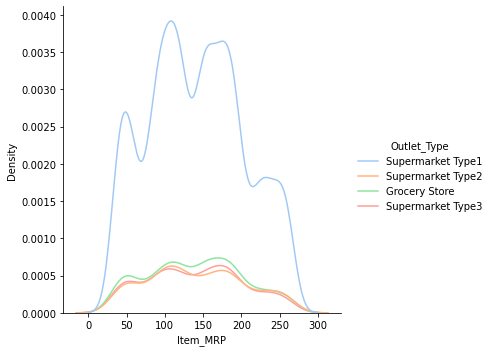

In [21]:
#mrp according ot outlet type
sns.displot(data = data,x = 'Item_MRP',kind = "kde",hue = 'Outlet_Type',legend = True,palette = 'pastel')
plt.show()

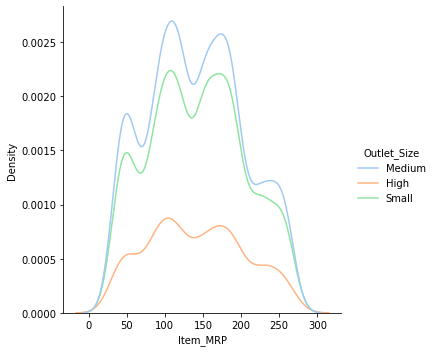

In [22]:
# outlet type
sns.displot(data = data,x = 'Item_MRP',kind = "kde",
            hue = 'Outlet_Size',legend = True,palette = 'pastel')
plt.show()

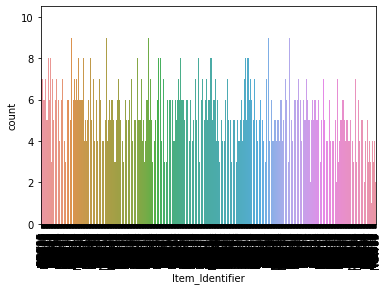

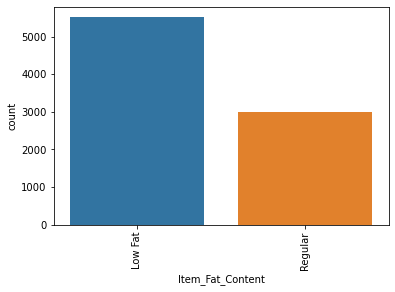

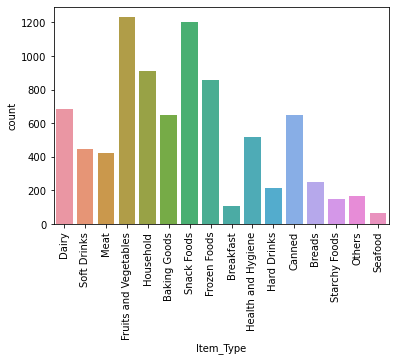

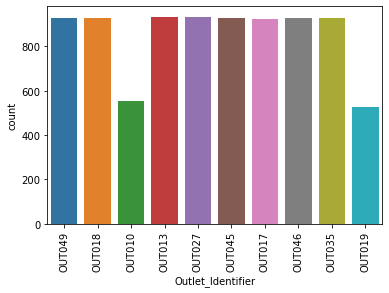

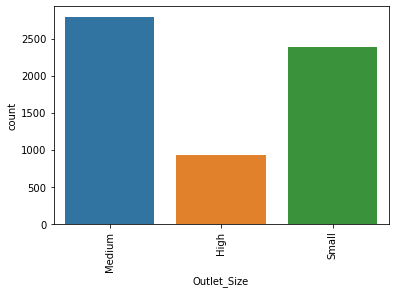

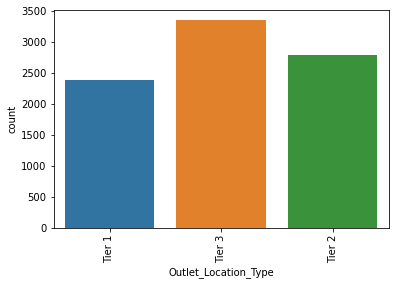

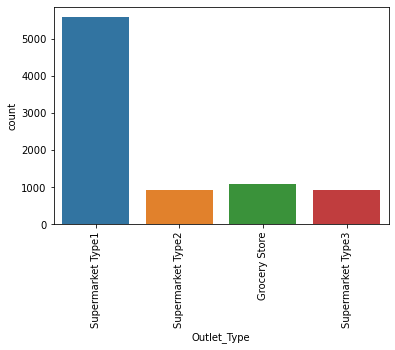

In [23]:
for i in categoric_col:
    sns.countplot(data = data,x = i)
    plt.xticks(rotation = 'vertical')
    plt.show()

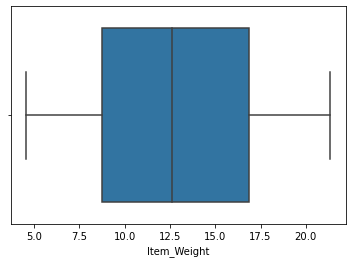

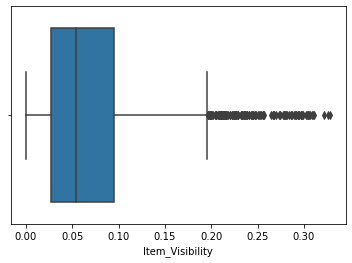

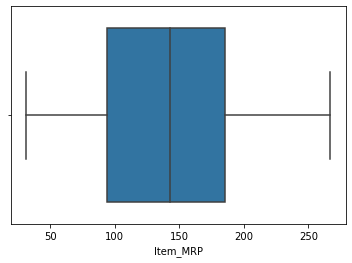

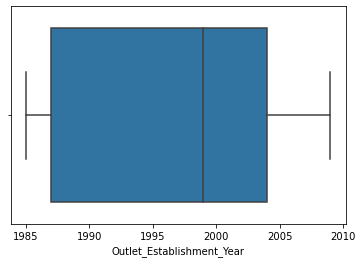

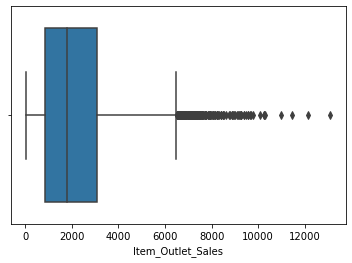

In [24]:
#box plot of all the numeric colss

for i in numeric_col:
    sns.boxplot(data= data,x = i)
    plt.show()

In [25]:
# handling missing values and data preprocessing
#since data is missing more than 5% either we can use knn imputer or random imputing method
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [26]:
#imputing the missing variable in item_weight randomly because this would not affect the distributions of the data

In [27]:
#to do
#missing handling 
#outlier handling

In [28]:
#applying the random imputations on item_size

In [29]:
# for outlet size medium 
a = data['Item_Weight'][(data['Outlet_Size'].isin(['Medium']))& (data['Item_Weight'].notnull())]
a.describe()

count    1858.000000
mean       12.895420
std         4.651906
min         4.555000
25%         8.810000
50%        12.625000
75%        17.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [30]:
data['Outlet_Size'][(data['Item_Weight'] > 8) & (data['Item_Weight'] <17) & (data['Outlet_Size'].isnull())] = 'Medium'

C:\Users\ABCD\AppData\Local\Temp\ipykernel_9536\847387129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlet_Size'][(data['Item_Weight'] > 8) & (data['Item_Weight'] <17) & (data['Outlet_Size'].isnull())] = 'Medium'


In [31]:
# for small outlet_size checking item outlet size
b = data['Item_Weight'][(data['Outlet_Size'].isin(['Small']))& (data['Item_Weight'].notnull())]
b.describe()

count    1860.000000
mean       12.848075
std         4.693634
min         4.555000
25%         8.670000
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [32]:
#filling where ever the item wight is in range of small
data['Outlet_Size'][(data['Item_Weight'] > 8) & (data['Item_Weight'] <=16.85)].isnull().sum()
#looks like no null in that range 

0

In [33]:
high = data['Item_Weight'][(data['Outlet_Size'].isin(['High']))& (data['Item_Weight'].notnull())]
high.describe()

count    932.000000
mean      13.006148
std        4.666798
min        4.555000
25%        8.891250
50%       12.850000
75%       17.025000
max       21.350000
Name: Item_Weight, dtype: float64

In [34]:
# imputting  high outlet size
data['Outlet_Size'][(data['Item_Weight'] > 8) & (data['Item_Weight'] <=17) & (data['Outlet_Size'].isnull())] = 'High'

C:\Users\ABCD\AppData\Local\Temp\ipykernel_9536\593802843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlet_Size'][(data['Item_Weight'] > 8) & (data['Item_Weight'] <=17) & (data['Outlet_Size'].isnull())] = 'High'


In [35]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1040
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
# now applying random imputations on the outletsize
data['Outlet_Size'][data['Outlet_Size'].isnull()] = data['Outlet_Size'].dropna().sample(1040,replace = True)

C:\Users\ABCD\AppData\Local\Temp\ipykernel_9536\518743349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlet_Size'][data['Outlet_Size'].isnull()] = data['Outlet_Size'].dropna().sample(1040,replace = True)
C:\Users\ABCD\AppData\Local\Temp\ipykernel_9536\518743349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlet_Size'][data['Outlet_Size'].isnull()] = data['Outlet_Size'].dropna().sample(1040,replace = True)


In [37]:
#random_weights_of_high_Outlets
data[(data['Outlet_Size'] == 'High')].isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [38]:
# random weights for medium_outlets
data['Item_Weight'][(data['Outlet_Size'] == 'Medium') & (data['Item_Weight'].isnull())] = data['Item_Weight'][(data['Outlet_Size'] == 'Medium') & (data['Item_Weight'].notnull())].sample(935,replace = True)

C:\Users\ABCD\AppData\Local\Temp\ipykernel_9536\3533787784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Weight'][(data['Outlet_Size'] == 'Medium') & (data['Item_Weight'].isnull())] = data['Item_Weight'][(data['Outlet_Size'] == 'Medium') & (data['Item_Weight'].notnull())].sample(935,replace = True)
C:\Users\ABCD\AppData\Local\Temp\ipykernel_9536\3533787784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Weight'][(data['Outlet_Size'] == 'Medium') & (data['Item_Weight'].isnull())] = data['Item_Weight'][(data['Outlet_Size'] == 'Medium') & (data['Item_Weight'].notnull())].sample(935,replace 

In [39]:
data['Item_Weight'][(data['Outlet_Size'] == 'Small') & (data['Item_Weight'].isnull())] = data['Item_Weight'][(data['Outlet_Size'] == 'Small') & (data['Item_Weight'].notnull())].sample(528,replace = True)

C:\Users\ABCD\AppData\Local\Temp\ipykernel_9536\1699661763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Weight'][(data['Outlet_Size'] == 'Small') & (data['Item_Weight'].isnull())] = data['Item_Weight'][(data['Outlet_Size'] == 'Small') & (data['Item_Weight'].notnull())].sample(528,replace = True)
C:\Users\ABCD\AppData\Local\Temp\ipykernel_9536\1699661763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Weight'][(data['Outlet_Size'] == 'Small') & (data['Item_Weight'].isnull())] = data['Item_Weight'][(data['Outlet_Size'] == 'Small') & (data['Item_Weight'].notnull())].sample(528,replace = Tr

In [40]:
# handling outliers 
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [43]:
# using .str to extract values from columns
data['id1'] = data['Item_Identifier'].str[0:1]
data['id2'] = data['Item_Identifier'].str[1:2]
data['id3'] = data['Item_Identifier'].str[2:3]
data['id4'] = data['Item_Identifier'].str[3:5]

In [44]:
data.drop('Item_Identifier',inplace = True,axis = 1)

In [45]:
data['id4'] = data.id4.astype(int)

In [47]:
data.head(4)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,id1,id2,id3,id4
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,F,D,A,15
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,D,R,C,1
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,F,D,N,15
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800,F,D,X,7


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:title={'center':'id4'}>]], dtype=object)

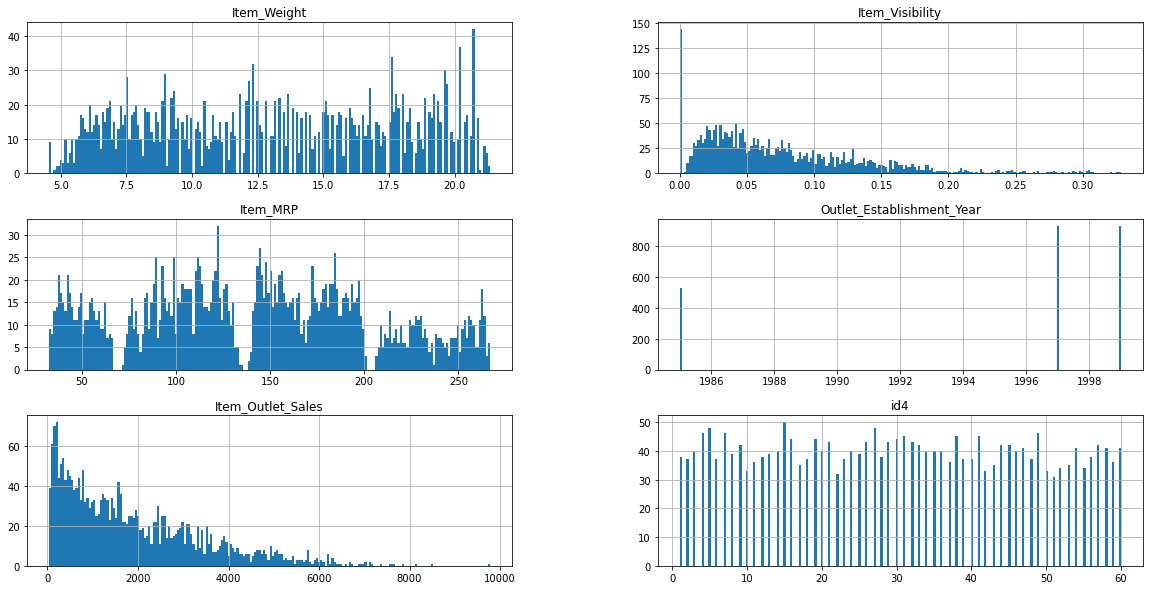

In [68]:
# what outlet type is performing well in different tiers
tier1 = data[data['Outlet_Location_Type'].isin(['Tier 1'])]
tier2 = data[data['Outlet_Location_Type'].isin(['Tier 2'])]
tier3 = data[data['Outlet_Location_Type'].isin(['Tier 3'])]
tier1.hist(bins=200,figsize=[20,10])

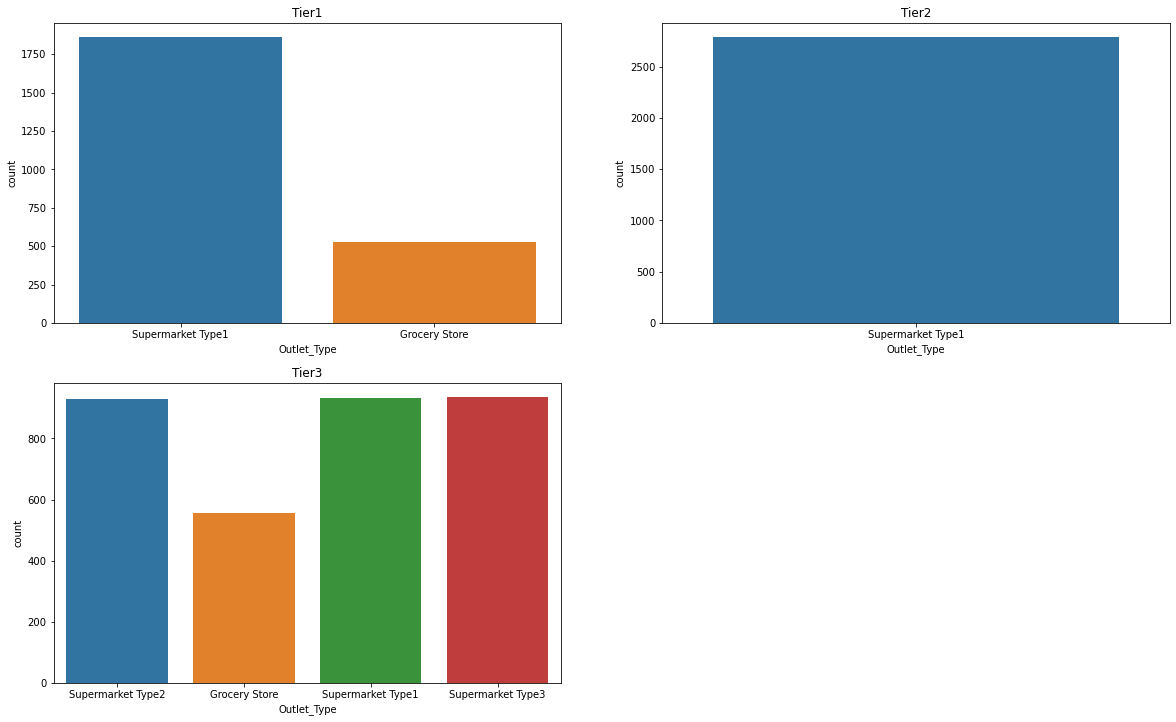

In [80]:
#dominating martket type according to tier cities
plt.figure(figsize = (20,32))

plt.subplot(5,2,1)
sns.countplot(x = 'Outlet_Type',data = tier1)
plt.title('Tier1')

plt.subplot(5,2,2)
sns.countplot(x = 'Outlet_Type',data = tier2)
plt.title('Tier2')

plt.subplot(5,2,3)
sns.countplot(x = 'Outlet_Type',data = tier3)
plt.title('Tier3')

plt.show()

In [108]:
# max sales generated by outlet type in tier 1
values = tier1.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().values
ot = tier1.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().index
values1 = tier2.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().values
ot1 = tier2.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().index
values2 = tier3.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().values
ot2 = tier3.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().index

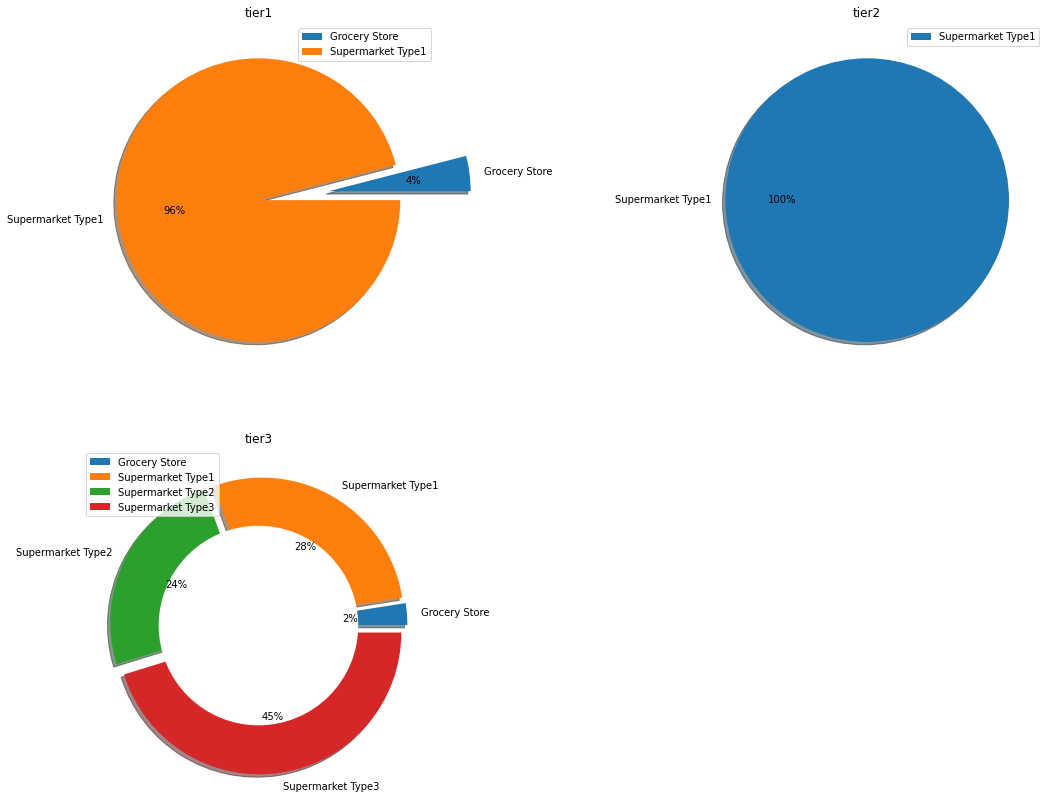

In [165]:
plt.figure(figsize = (20,30))

plt.subplot(4,2,1)
plt.pie(values,labels = ot,autopct = '%.0f%%',explode = [0.5,0],shadow  = True)
plt.legend(ot,loc = 0)
plt.title('tier1')
plt.subplot(4,2,2)
plt.pie(values1,labels = ot1,autopct = '%.0f%%',shadow  = True)
plt.legend(ot1,loc = 0)
plt.title('tier2')
# creating donut charts
plt.subplot(4,2,3)
plt.pie(values2,labels = ot2,autopct = '%.0f%%',explode = [0.05,0.05,0.05,0.05],shadow  = True)
# put circle on pie
circle = plt.Circle( (0,0), 0.7, color='white')
plt.gcf().gca().add_artist(circle)
plt.legend(ot2,loc =2)
plt.title('tier3')
plt.show()

In [169]:
transformers = ColumnTransformer(transformers = [
    ('tnf1',OrdinalEncoder(categories = [['Low Fat','Regular']]),['Item_Fat_Content']),
    ('tnf2',OrdinalEncoder(categories = [['Small','Medium','High']]),['Outlet_Size']),
    ('tnf3',OrdinalEncoder(categories = [['Tier 1','Tier 2','Tier 3']]),['Outlet_Location_Type']),
    ('tnf4',OneHotEncoder(sparse = False,drop = 'first'),['Outlet_Type','Item_Type','Outlet_Identifier']),
    ('tnf5',OrdinalEncoder(),['id1','id2','id3'])
    ],remainder = 'passthrough')

In [176]:
x = data.loc[:,data.columns != 'Item_Outler_Sales']
y = data.Item_Outlet_Sales

In [178]:
x_trf = transformers.fit_transform(x)

<AxesSubplot:>

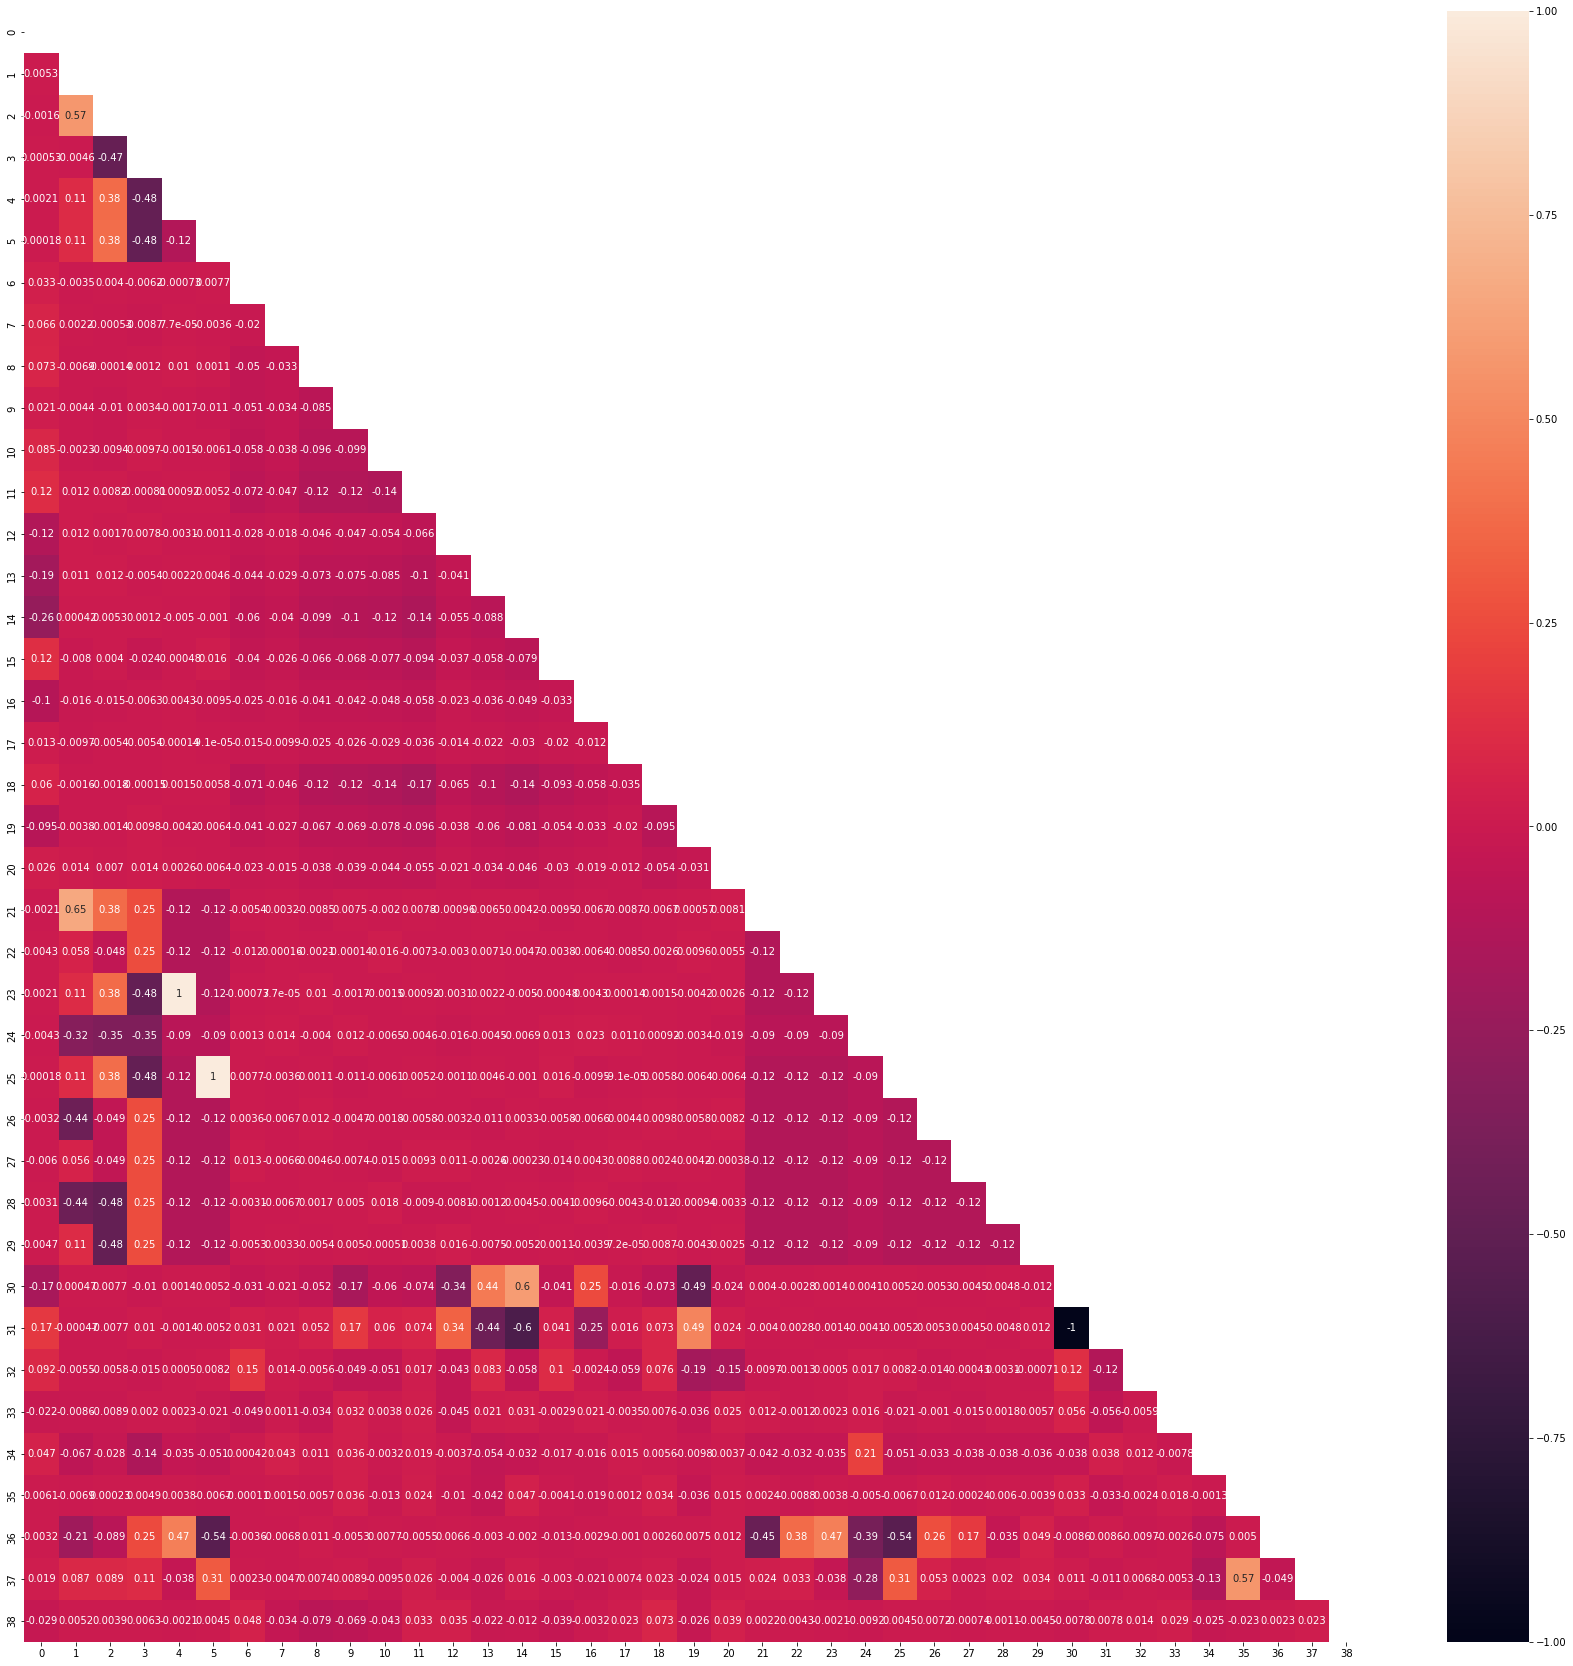

In [235]:
corr = pd.DataFrame(x_trf).corr()
plt.figure(figsize = (30,30))
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,annot = True,mask = mask)

In [258]:
x_train,x_test,y_train,y_test = train_test_split(x_trf,y, random_state = 6,test_size = 0.25)

In [259]:
from sklearn.linear_model import LinearRegression

In [260]:
model = LinearRegression()

In [261]:
model.fit(x_train,y_train)

LinearRegression()

In [262]:
model.score(x_train,y_train)

1.0

In [263]:
pred = model.predict(x_test)

In [264]:
model.score(x_test,y_test)

1.0

In [265]:
model.coef_

array([ 2.18767962e-13,  3.41511374e-14,  2.45104483e-13, -1.86931293e-13,
       -3.71449492e-13, -4.20589272e-13,  4.46402681e-13,  1.97764314e-13,
        1.28445755e-13,  1.68882192e-13,  2.48652122e-13,  1.70756678e-13,
        4.98025316e-14,  4.66108831e-13,  4.72802425e-13,  1.69341450e-13,
        6.19217790e-13,  2.96747529e-13,  3.02916769e-13, -6.21127335e-14,
        2.44685051e-13,  2.01113273e-15, -1.26392822e-13, -3.71445751e-13,
       -1.00373758e-13, -4.20594991e-13, -2.57818635e-13,  5.06734426e-14,
        1.59911526e-13, -1.53219316e-14, -1.10188956e-13,  1.10188956e-13,
        3.56372990e-16,  3.86238018e-15,  1.90346799e-14, -5.10948313e-16,
        7.58021304e-15,  1.00000000e+00,  6.81394173e-16])

In [266]:
from sklearn.metrics import r2_score

In [267]:
r2_score(pred,y_test)

1.0

In [268]:
from sklearn.ensemble import RandomForestRegressor

In [269]:
model2 = RandomForestRegressor()

In [270]:
model2.fit(x_train,y_train)

RandomForestRegressor()

In [271]:
model2.score(x_train,y_train)

0.999962384565119

In [272]:
predrr = model2.predict(x_test)

In [273]:
r2_score(predrr,y_test)

0.9999739186473942

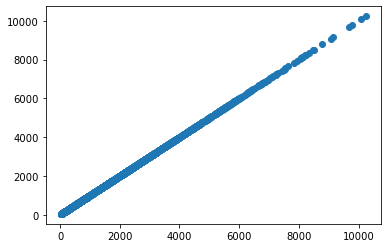

In [274]:
plt.scatter(pred,y_test)

In [289]:
a = np.array(y_test.array).reshape(-1,1)
predrr = predrr.reshape(-1,1)
pd.DataFrame(np.hstack((a,predrr)))

,0,1
0,942.7728,942.932592
1,1813.6392,1813.213088
2,1813.6392,1812.960084
3,4174.5660,4173.467430
4,4152.5946,4153.659880
...,...,...
2126,715.0692,714.982646
2127,3175.8660,3174.101630
2128,1104.5622,1104.955022
2129,1118.5440,1118.770372
